In [ ]:
!pip install -q py-feat
# !pip install -q facial-emotion-recognition
# !pip install -q fer
# !pip install -q deepface
!pip install -q mtcnn

     |████████████████████████████████| 2.3MB 7.3MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
from feat import Detector
import glob
import math
import dlib
import joblib
import cv2
from tqdm.notebook import tqdm
from google.colab.patches import cv2_imshow
from collections import Counter
from mtcnn import MTCNN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
################ FER

# https://github.com/justinshenk/fer
# from fer import FER
# import operator
# # detector = FER()
# detector = FER(mtcnn=True)

################ DeepFace
# from deepface import DeepFace
# https://awesomeopensource.com/project/serengil/deepface
# obj = DeepFace.analyze(img_path = "img4.jpg", actions = ['age', 'gender', 'race', 'emotion'])
# print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

################# py-feat

# from feat import Detector
face_model = "MTCNN"
landmark_model = "PFLD"
au_model = "rf"
emotion_model = "resmasknet" #resmasknet,fer, svm, rf
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

detector_MTCNN = MTCNN()

Loading Face Detection model:  MTCNN
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/onet.npy
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/pnet.npy
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/rnet.npy
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/pfld_model_best.pth.tar
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/RF_568.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_pca_all_em

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid r

Loading emotion model:  resmasknet


In [ ]:
def cal_mean_std(image):
  val = np.reshape(image[:,:,0], -1)
  img_mean = np.mean(val)
  img_std = np.std(val)
  X = np.array([img_mean, img_std]).reshape(1, -1)
  return X

def my_mode(sample):
  c = Counter(sample)
  return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

### List

In [ ]:
# datalist = ['Anongrat_06_810', 'Anongrat_06_811', 'Anongrat_06_812', 'Anongrat_06_813', 'Anongrat_06_814',
#             'Anongrat_06_815', 'Anongrat_06_816', 'Anongrat_06_817', 'Anongrat_06_818', 'Anongrat_06_819',
#             'Anongrat_06_8110', 'Anongrat_06_8111', 'Anongrat_06_8112', 'Anongrat_06_8113', 'Anongrat_06_8114',
#             'Anongrat_06_8115', 'Anongrat_06_8116', 'Anongrat_06_8117', 'Anongrat_06_8118', 'Anongrat_06_8119',
#             'Anongrat_06_8120', 'Anongrat_06_8121']

In [ ]:
predf_2 = []
actf_2 = []
for name in datalist:
  data = np.load('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/prepare_data/new/Anongrat/'+ name +'.npy', allow_pickle=True)
  for i in tqdm(range(data.shape[0])):
    seqimg   =  []
    for j in range(len(data[i][0])):
      img = data[i][0][j]
      label = data[i][1]
      # cv2_imshow(img)
      try:
        detected_faces = [[0, 0, img.shape[0]-1, img.shape[1]-1, 1]]
        detected_landmarks = detector.detect_landmarks(img, detected_faces)
        ypred = detector.detect_emotions(img, detected_faces, detected_landmarks)[0]
        ypred_arg = np.argmax(ypred)
      except:
        print("error i = ",i, ' j =', j)
        pass
      seqimg.append(ypred_arg) 
    seq_label = my_mode(seqimg)
    print('seq_label', seq_label)
    predf_2.append(seq_label[0])
    actf_2.append(label)

In [ ]:
# #svm, rf
# image_prediction = detector.detect_image(img)
# ypred = image_prediction.emotions()
# ypred_arg = np.argmax(ypred)

## Single

In [ ]:
predf_2 = []
actf_2 = []
data = np.load('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/prepare_data/new/Anongrat/Anongrat_06_8116.npy', allow_pickle=True)
for i in tqdm(range(data.shape[0])):
  seqimg   =  []
  for j in range(len(data[i][0])):
    img = data[i][0][j]
    label = data[i][1]
    try:
      detected_faces = [[0, 0, img.shape[0]-1, img.shape[1]-1, 1]]
      detected_landmarks = detector.detect_landmarks(img, detected_faces)
      ypred = detector.detect_emotions(img, detected_faces, detected_landmarks)[0]
      ypred_arg = np.argmax(ypred)
    except:
      pass
    
    seqimg.append(ypred_arg) #ypred_arg
  seq_label = my_mode(seqimg)
  print('seq_label', seq_label)
  predf_2.append(seq_label[0])
  actf_2.append(label)

In [ ]:
# #svm, rf
# image_prediction = detector.detect_image(img)
# ypred = image_prediction.emotions()
# ypred_arg = np.argmax(ypred)

## Path

In [ ]:
predf = []
actf = []
for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/prepare_data/*.npy'):
  print(files)
  data = np.load(files, allow_pickle=True)
  for i in tqdm(range(data.shape[0])):
    seqimg   =  []
    for j in range(len(data[i][0])):
      img = data[i][0][j]
      # cv2_imshow(img)
      label = data[i][1]
      try:
        obj = DeepFace.analyze(img_path = img, actions = ['emotion'])
        deepf = obj["dominant_emotion"]
      except:
        print("error i =", i, ' j =', j)
        deepf = 'neutral'

      if deepf == 'angry':
        ypred_arg = 0
      elif deepf == 'disgust':
        ypred_arg = 1
      elif deepf == 'fear':
        ypred_arg = 2
      elif deepf == 'happy':
        ypred_arg = 3
      elif deepf == 'sad':
        ypred_arg = 4
      elif deepf == 'surprise':
        ypred_arg = 5
      elif deepf == 'neutral':
        ypred_arg = 6
      
      seqimg.append(ypred_arg) #ypred_arg
    seq_label = my_mode(seqimg)
    print('seq_label', seq_label)
    predf.append(seq_label[0])
    actf.append(label)
  np.save('df_pred'+str(i)+'.npy', np.array(predf))
  np.save('df_act'+str(i)+'.npy', np.array(actf))

## ALL STEP IN ONE

In [ ]:
predf_2 = []
actf_2 = []

namefile = 'Wachiraya1.csv'
vdo_link = 'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/Wachiraya/02_016.mp4'
df = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/'+namefile)
rowimg = []
label_img = []
df = df.loc[df['source'] == '02_016']
df.reset_index(drop=True, inplace=True)
print('df', df.shape)

for i in tqdm(range(66,df.shape[0])):
  seqimg = []
  for j in range(df['start_frame'][i], df['end_frame'][i]):
    cap = cv2.VideoCapture(vdo_link)
    cap.set(cv2.CAP_PROP_POS_FRAMES, j)
    success, image = cap.read()
    scale_percent = 50 
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim)
    try:
      faceimg = detector_MTCNN.detect_faces(resized)
      faceimg = faceimg[0]['box']
      faceimg =resized[faceimg[1]-30:faceimg[1]+faceimg[3]+30,faceimg[0]-30:faceimg[0]+faceimg[2]+30] #[x, y, width, height]  
      # cv2_imshow(faceimg)
    except:
      try:
        faceimg = detect_faces(resized)
      except:
        pass
        # print("error i = ",i, ' j =', j)
    try:
      detected_faces = [[0, 0, faceimg.shape[0]-1, faceimg.shape[1]-1, 1]]
      detected_landmarks = detector.detect_landmarks(faceimg, detected_faces)
      ypred = detector.detect_emotions(faceimg, detected_faces, detected_landmarks)[0]
      ypred_arg = np.argmax(ypred)
      seqimg.append(ypred_arg) #ypred_arg
    except:
      pass
  seq_label = my_mode(seqimg)
  print('i =', i, 'seq_label =', seq_label)
  predf_2.append(seq_label[0])
  actf_2.append(label)    

df (136, 11)


i = 0 seq_label = [3]
i = 1 seq_label = [6]
i = 2 seq_label = [3]
i = 3 seq_label = [6]
i = 4 seq_label = [3]
i = 5 seq_label = [6]
i = 6 seq_label = [6]
i = 7 seq_label = [6]
i = 8 seq_label = [3]
i = 9 seq_label = [6]
i = 10 seq_label = [6]
i = 11 seq_label = [6]
i = 12 seq_label = [6]
i = 13 seq_label = [3]
i = 14 seq_label = [6]
i = 15 seq_label = [6]
i = 16 seq_label = [6]
i = 17 seq_label = [3]
i = 18 seq_label = [6]
i = 19 seq_label = [6]
i = 20 seq_label = [6]
i = 21 seq_label = [6]
i = 22 seq_label = [3]
i = 23 seq_label = [3]
i = 24 seq_label = [6]
i = 25 seq_label = [6]
i = 26 seq_label = [6]
i = 27 seq_label = [6]
i = 28 seq_label = [6]
i = 29 seq_label = [6]
i = 30 seq_label = [6]
i = 31 seq_label = [6]
i = 32 seq_label = [6]
i = 33 seq_label = [6]
i = 34 seq_label = [6]
i = 35 seq_label = [6]
i = 36 seq_label = [6]
i = 37 seq_label = [6]
i = 38 seq_label = [6]
i = 39 seq_label = [6]
i = 40 seq_label = [6]
i = 41 seq_label = [3]
i = 42 seq_label = [6]
i = 43 seq_label = [6

In [ ]:
len(predf_2)

68

In [ ]:
while True:pass

In [ ]:
predf = []
actf = []
for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/prepare_data/*.npy'):
  print(files)
  data = np.load(files, allow_pickle=True)
  for i in tqdm(range(data.shape[0])):
    seqimg   =  []
    for j in range(len(data[i][0])):
      img = data[i][0][j]
      label = data[i][1]

      ###################### mean std ###########################
      # img = img.astype('float32')
      # image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.0
      # X = cal_mean_std(image)
      # ypred = model.predict(X)[0]
          
      ###################### mean std landmark ###########################
      # image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.0
      # X = cal_mean_std(image).tolist()[0]
      # try:
      #   data_fea = np.array(get_landmarks(img)['landmarks_vectorised']).tolist()
      #   x_test = np.array(X+data_fea).reshape(1,-1)
      #   ypred = model.predict(x_test)[0]
      # except:
      #   ypred = 6
    
      ###################### Py-feat resmasknet, Fer ###########################
      detected_faces = [[0, 0, img.shape[0]-1, img.shape[1]-1, 1]]
      detected_landmarks = detector.detect_landmarks(img, detected_faces)
      ypred = detector.detect_emotions(img, detected_faces, detected_landmarks)[0]
      ypred_arg = np.argmax(ypred)

      ###################### Py-feat svm, rf ###################################
      # image_prediction = detector.detect_image(img)
      # ypred = image_prediction.emotions()
      # ypred_arg = np.argmax(ypred)

      # emotion, score = detector.top_emotion(img)
      # emotion = detector.detect_emotions(img)[0]['emotions']
      # ypred_arg = max(emotion.items(), key=operator.itemgetter(1))[0]

      # if emotion == 'anger':
      #   ypred_arg = 0
      # elif emotion == 'disgust':
      #   ypred_arg = 1
      # elif emotion == 'fear':
      #   ypred_arg = 2
      # elif emotion == 'happy':
      #   ypred_arg = 3
      # elif emotion == 'sad':
      #   ypred_arg = 4
      # elif emotion == 'surprise':
      #   ypred_arg = 5
      # elif emotion == 'neutral':
      #   ypred_arg = 6

      # obj = DeepFace.analyze(img_path = img, actions = ['age','emotion'])
      # print(obj["dominant_emotion"])
      # deepf = obj["dominant_emotion"]

      # if deepf == 'angry':
      #   ypred_arg = 0
      # elif deepf == 'disgust':
      #   ypred_arg = 1
      # elif deepf == 'fear':
      #   ypred_arg = 2
      # elif deepf == 'happy':
      #   ypred_arg = 3
      # elif deepf == 'sad':
      #   ypred_arg = 4
      # elif deepf == 'surprise':
      #   ypred_arg = 5
      # elif deepf == 'neutral':
      #   ypred_arg = 6
      
      seqimg.append(ypred_arg) #ypred_arg
    seq_label = my_mode(seqimg)
    print('seq_label', seq_label)
    predf.append(seq_label[0])
    actf.append(label)
  np.save('df_pred'+str(i)+'.npy', np.array(predf))
  np.save('df_act'+str(i)+'.npy', np.array(actf))

In [ ]:
# label_kaggle = (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
# label_ck+ = (1=anger", "3=disgust", "4=fear", "5=happy", "6=sadness", "7=surprise") 
# resmasknet = ( anger=0,	disgust=1, fear=2, happiness=3,	sadness=4,	surprise=5,	neutral=6 )
# fer, svm, rf = ( anger=0,	disgust=1, fear=2, happiness=3,	sadness=4,	surprise=5,	neutral=6 )
# fer             = ( anger=0, 'disgust=1,fear=2,  happy=3,      sad=4,        surprise=5, neutral=6 )
# Deepfake    = (angry=0, fear=1, neutral=2, sad=3, disgust=4, happy=5 and surprise = 6)

In [ ]:
result = pd.DataFrame({'label':actf_2, 'pred' : predf_2}).replace({'happy':3, 'surprise':5, 'relax':6, 'Neutral':6, 'neutral':6,'stress':0,'anger':0,'sad':4  }) # fer 1
# result = result[result.pred != 2]
result = result[result.pred != 2]
result = result[result.pred != 1]

In [ ]:
print(pd.unique(result['pred']))
print(pd.unique(result['label']))

[3]
[0 6 4 3]


In [ ]:
df = pd.read_csv('/content/result.csv')

In [ ]:
# ground_truth = pd.DataFrame(data[:,1], columns=['lable']).replace({'happy':5, 'surprise':7, 'relax':0, 'Neutral':0}) # ck+
# ground_truth = pd.DataFrame(data[:,1], columns=['lable']).replace({'happy':3, 'surprise':5, 'relax':6, 'Neutral':6}) # kaggle
# ground_truth = pd.DataFrame(data[:,1], columns=['lable']).replace({'happy':3, 'surprise':5, 'relax':6, 'Neutral':6}) # resmasknet
result = pd.concat([result['label'], result['pred']], axis=1, join="inner")
result

In [ ]:
from google.colab import files
result.to_csv('result_6.csv') 
files.download('result_6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           3       0.94      0.21      0.34        76
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.21        77
   macro avg       0.19      0.04      0.07        77
weighted avg       0.93      0.21      0.34        77

Accuracy:  0.2077922077922078


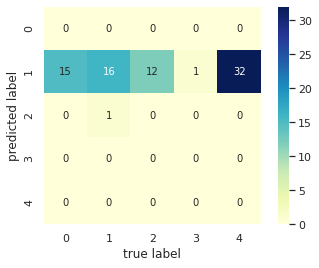

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix



def plot_confus(pred_lable, truelable):
  print(metrics.classification_report(pred_lable, truelable))
  print('Accuracy: ',metrics.accuracy_score(truelable, pred_lable))

  mat = confusion_matrix(truelable, pred_lable)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu")
  # tick_marks = np.arange(len(target_names))
  # plt.xticks(tick_marks, target_names, rotation ='vertical', ha='center')
  # plt.yticks(tick_marks, target_names, rotation ='horizontal', ha='center')
  plt.xlabel('true label')
  plt.ylabel('predicted label'); 

plot_confus(df['pred'], df['label'])

In [ ]:
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y_true, y_pred)

In [ ]:
# https://medium.com/clique-org/how-to-create-a-face-recognition-model-using-facenet-keras-fd65c0b092f1